In [1]:
### Business problem: To understand what are the factors affect the price of Singapore's resale flat
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

In [3]:
# to import dataset of SG resale flat price
df = pd.read_csv('C:/Users/miche/Desktop/machine_learning/Resale_flat_prices_sg.csv')

In [4]:
df.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2017-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61 years 04 months,232000.0
1,2017-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,60 years 07 months,250000.0
2,2017-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,262000.0
3,2017-01,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1980,62 years 01 month,265000.0
4,2017-01,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,265000.0


In [5]:
# to check for missing variables
df.isnull().sum()

month                  0
town                   0
flat_type              0
block                  0
street_name            0
storey_range           0
floor_area_sqm         0
flat_model             0
lease_commence_date    0
remaining_lease        0
resale_price           0
dtype: int64

In [6]:
# to check for any duplicated values in dataset
duplicates = df[df.duplicated()]

In [7]:
# there are 278 rows of duplicated data
duplicates

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
243,2017-01,BUKIT MERAH,4 ROOM,106,HENDERSON CRES,07 TO 09,81.0,Improved,1975,57 years,470000.0
305,2017-01,CENTRAL AREA,3 ROOM,271,QUEEN ST,16 TO 18,68.0,Improved,1979,61 years 02 months,470000.0
510,2017-01,JURONG EAST,4 ROOM,265,TOH GUAN RD,04 TO 06,101.0,Model A,1998,80 years 09 months,470000.0
591,2017-01,JURONG WEST,4 ROOM,337A,TAH CHING RD,19 TO 21,92.0,Model A,2010,92 years 03 months,470000.0
672,2017-01,PASIR RIS,4 ROOM,753,PASIR RIS ST 71,01 TO 03,105.0,Model A,1996,78 years 10 months,368000.0
...,...,...,...,...,...,...,...,...,...,...,...
154401,2023-09,KALLANG/WHAMPOA,3 ROOM,93,GEYLANG BAHRU,04 TO 06,68.0,New Generation,1979,54 years 05 months,420000.0
156908,2023-03,PUNGGOL,4 ROOM,232A,SUMANG LANE,16 TO 18,93.0,Model A,2018,94 years 08 months,580000.0
158603,2023-08,SEMBAWANG,4 ROOM,104D,CANBERRA ST,13 TO 15,93.0,Model A,2018,94 years,600000.0
163813,2023-04,WOODLANDS,4 ROOM,28,MARSILING DR,07 TO 09,97.0,New Generation,1977,53 years,395000.0


In [8]:
# to remove duplicated rows from dataset
df = df.drop_duplicates(keep='first', inplace=False)

In [9]:
# to check if the variables are in their correct data types
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 166801 entries, 0 to 167078
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                166801 non-null  object 
 1   town                 166801 non-null  object 
 2   flat_type            166801 non-null  object 
 3   block                166801 non-null  object 
 4   street_name          166801 non-null  object 
 5   storey_range         166801 non-null  object 
 6   floor_area_sqm       166801 non-null  float64
 7   flat_model           166801 non-null  object 
 8   lease_commence_date  166801 non-null  int64  
 9   remaining_lease      166801 non-null  object 
 10  resale_price         166801 non-null  float64
dtypes: float64(2), int64(1), object(8)
memory usage: 15.3+ MB


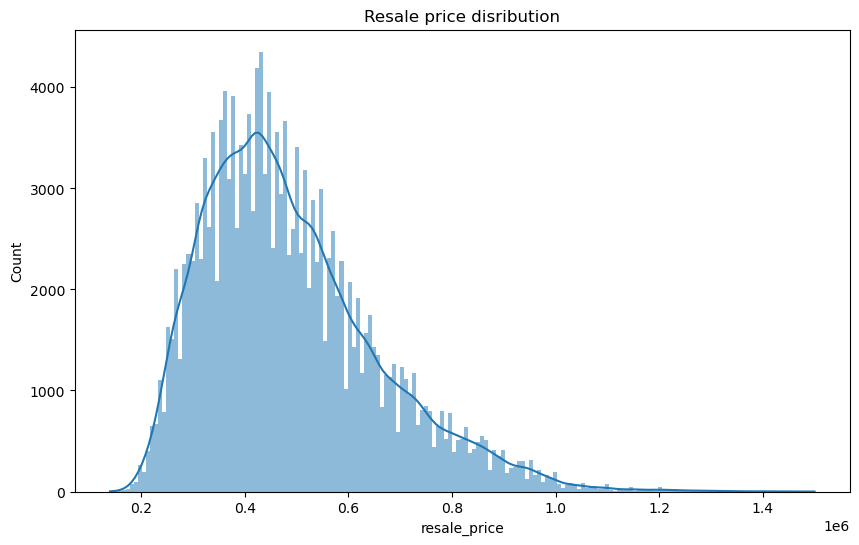

In [10]:
# to plot a distribution of resale price
plt.figure(figsize=(10,6), dpi=100)
sns.histplot(data=df, x='resale_price', edgecolor=None, kde=True)
plt.title('Resale price disribution');

In [11]:
# to do some feature engineering for some of the variables
df['remaining_lease']

0         61 years 04 months
1         60 years 07 months
2         62 years 05 months
3          62 years 01 month
4         62 years 05 months
                 ...        
167074    63 years 06 months
167075    63 years 06 months
167076    63 years 07 months
167077    63 years 11 months
167078    63 years 06 months
Name: remaining_lease, Length: 166801, dtype: object

In [12]:
# to use lambda apply to grab only the first 2 digits in every row and to create a new variable
df['Remaining_lease'] = df['remaining_lease'].apply(lambda x:x.split(' ')[0])

In [13]:
# to convert the month column into datetime
df['month'] = pd.to_datetime(df['month'])

In [14]:
# to create new variables in the dataset
df['Month'] = df['month'].dt.month

In [15]:
df['year'] = df['month'].dt.year

In [16]:
df.tail()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,Remaining_lease,Month,year
167074,2023-05-01,YISHUN,EXECUTIVE,827,YISHUN ST 81,01 TO 03,154.0,Maisonette,1987,63 years 06 months,829000.0,63,5,2023
167075,2023-05-01,YISHUN,EXECUTIVE,824,YISHUN ST 81,07 TO 09,146.0,Maisonette,1987,63 years 06 months,855000.0,63,5,2023
167076,2023-07-01,YISHUN,EXECUTIVE,837,YISHUN ST 81,01 TO 03,146.0,Maisonette,1988,63 years 07 months,860000.0,63,7,2023
167077,2023-01-01,YISHUN,MULTI-GENERATION,666,YISHUN AVE 4,07 TO 09,179.0,Multi Generation,1987,63 years 11 months,1080000.0,63,1,2023
167078,2023-06-01,YISHUN,MULTI-GENERATION,633,YISHUN ST 61,04 TO 06,159.0,Multi Generation,1987,63 years 06 months,935000.0,63,6,2023


In [17]:
# to remove unwanted columns after extracting information
df = df.drop(['remaining_lease','month'], axis=1)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 166801 entries, 0 to 167078
Data columns (total 12 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   town                 166801 non-null  object 
 1   flat_type            166801 non-null  object 
 2   block                166801 non-null  object 
 3   street_name          166801 non-null  object 
 4   storey_range         166801 non-null  object 
 5   floor_area_sqm       166801 non-null  float64
 6   flat_model           166801 non-null  object 
 7   lease_commence_date  166801 non-null  int64  
 8   resale_price         166801 non-null  float64
 9   Remaining_lease      166801 non-null  object 
 10  Month                166801 non-null  int32  
 11  year                 166801 non-null  int32  
dtypes: float64(2), int32(2), int64(1), object(7)
memory usage: 15.3+ MB


In [19]:
df['flat_type'].unique()

array(['2 ROOM', '3 ROOM', '4 ROOM', '5 ROOM', 'EXECUTIVE', '1 ROOM',
       'MULTI-GENERATION'], dtype=object)

In [20]:
df['flat_type'].value_counts()

flat_type
4 ROOM              70206
5 ROOM              41729
3 ROOM              39365
EXECUTIVE           12568
2 ROOM               2797
MULTI-GENERATION       73
1 ROOM                 63
Name: count, dtype: int64

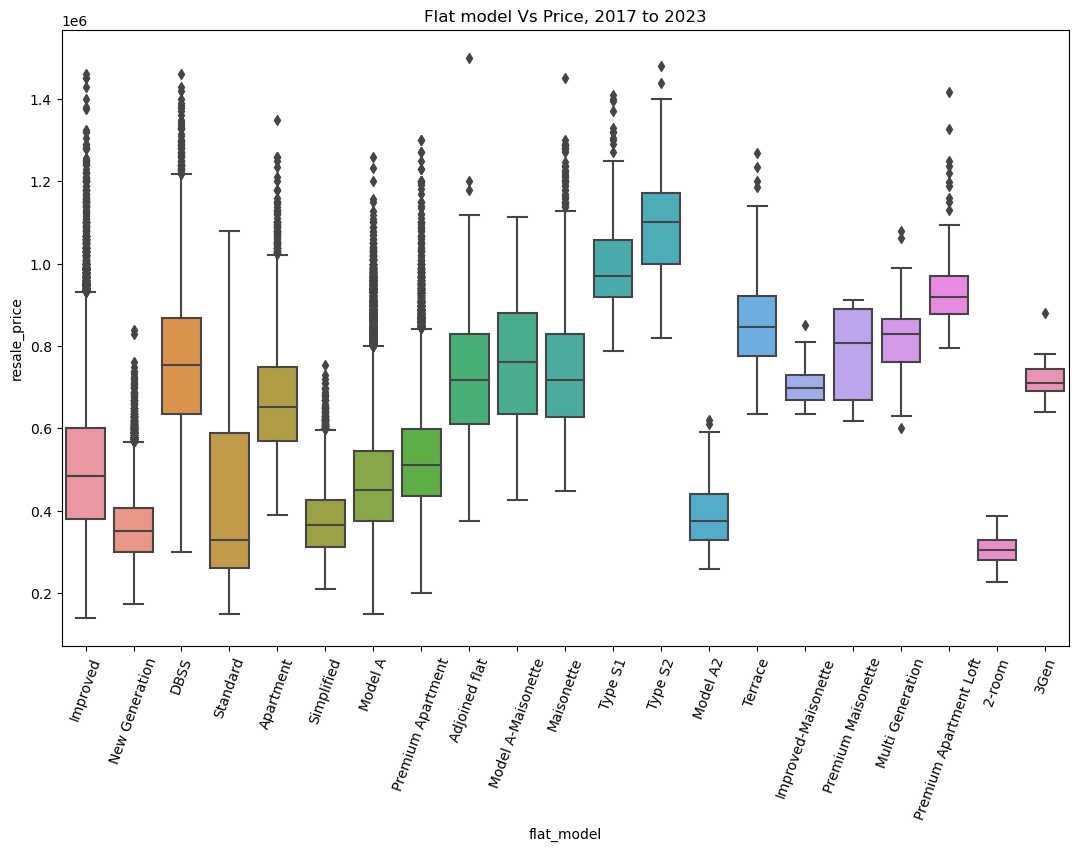

In [21]:
# to compare flat model against resale price
# it is observed that Type S1, S2 are the most expensive flat, 2room flats are the cheapest
plt.figure(figsize=(13,8), dpi=100)
sns.boxplot(data=df, x='flat_model', y='resale_price')
plt.xticks(rotation=70)
plt.title('Flat model Vs Price, 2017 to 2023');

In [22]:
# to print the average price according to the model of the flat
pd.DataFrame(df.groupby('flat_model')['resale_price'].mean().sort_values(ascending=False))

,resale_price
flat_model,
Type S2,1.102901e+06
Type S1,1.000044e+06
Premium Apartment Loft,9.501907e+05
Terrace,8.602159e+05
Multi Generation,8.232595e+05
Premium Maisonette,7.795000e+05
DBSS,7.639045e+05
Model A-Maisonette,7.568237e+05
Maisonette,7.340305e+05


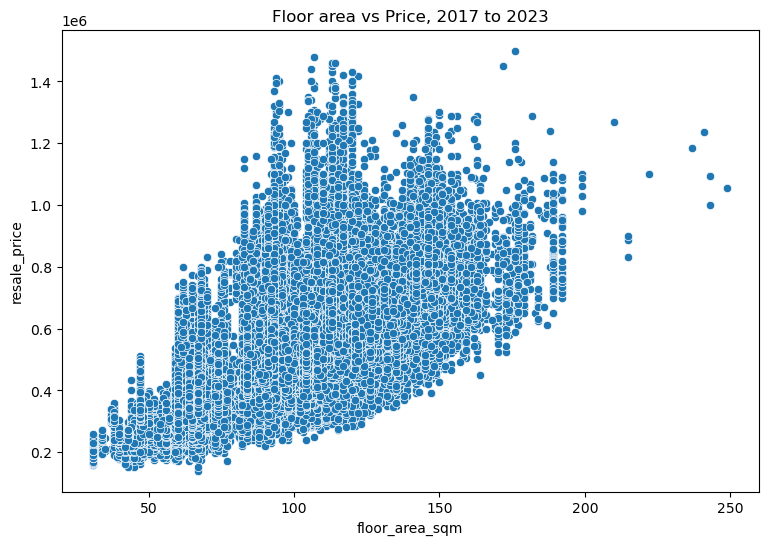

In [23]:
plt.figure(figsize=(9,6),dpi=100)
sns.scatterplot(data=df, x='floor_area_sqm',y='resale_price')
plt.title('Floor area vs Price, 2017 to 2023');

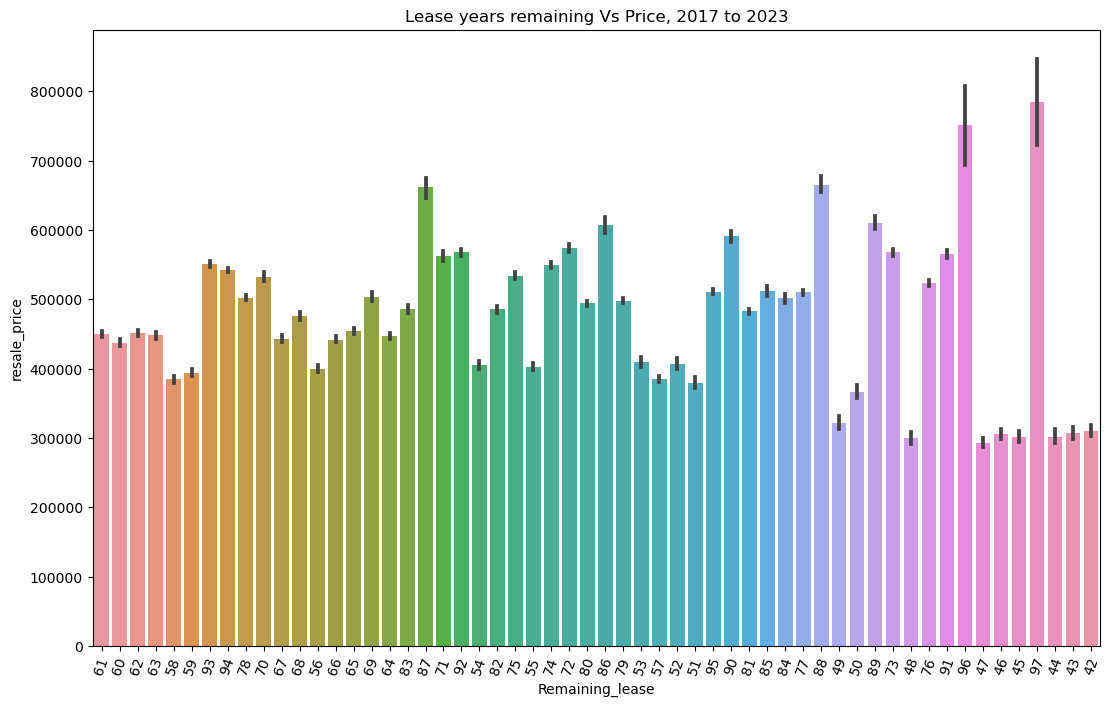

In [24]:
# the longer the lease years remaining, the more expensive the flat
plt.figure(figsize=(13,8), dpi=100)
sns.barplot(data=df, x='Remaining_lease', y='resale_price')
plt.title('Lease years remaining Vs Price, 2017 to 2023')
plt.xticks(rotation=70);

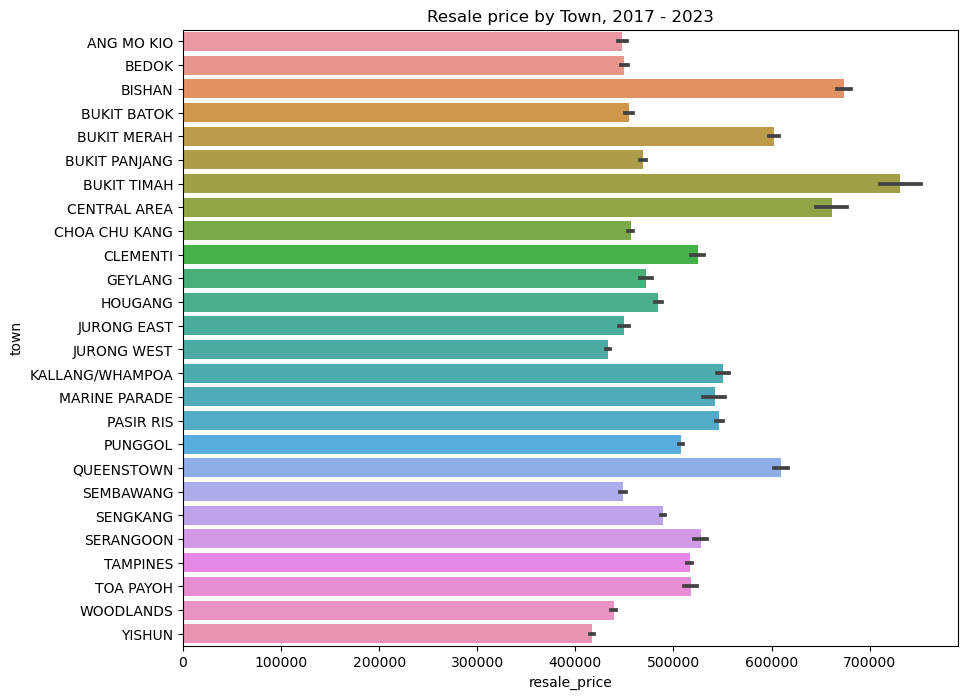

In [25]:
# seems like the flats around Bukit Timah fetch the highest price
plt.figure(figsize=(10,8),dpi=100)
sns.barplot(data=df, y='town', x='resale_price')
plt.title('Resale price by Town, 2017 - 2023');

In [26]:
# to print the average resale price by Town
# HDB flats in Bukit Timah is the most expensive followed by Bishan
pd.DataFrame(round(df.groupby('town')['resale_price'].mean(),2).sort_values(ascending=False))

,resale_price
town,
BUKIT TIMAH,731317.50
BISHAN,673902.47
CENTRAL AREA,661281.35
QUEENSTOWN,609860.38
BUKIT MERAH,602689.47
KALLANG/WHAMPOA,550731.77
PASIR RIS,546795.60
MARINE PARADE,541918.10
SERANGOON,527934.22


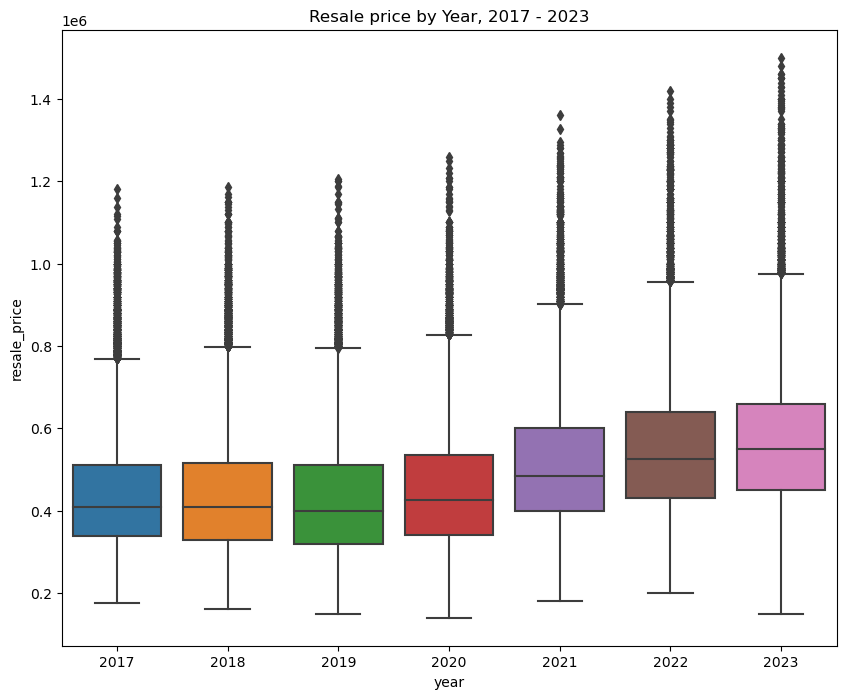

In [27]:
plt.figure(figsize=(10,8), dpi=100)
sns.boxplot(data=df, x='year', y='resale_price')
plt.title('Resale price by Year, 2017 - 2023');

In [28]:
# From 2021 onward, there is a sharp increase in housing prices
# to print the average resale price by year
pd.DataFrame(round(df.groupby('year')['resale_price'].mean(),2))

,resale_price
year,
2017,443743.44
2018,441310.44
2019,432180.07
2020,452312.74
2021,511421.74
2022,549701.07
2023,571035.19


In [29]:
# to filter dataset by year 2023 before EDA
df2 = df[df['year'] ==2023]

In [30]:
df2.head()

,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,Remaining_lease,Month,year
143395,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,01 TO 03,44.0,Improved,1979,267000.0,55,1,2023
143396,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,04 TO 06,44.0,Improved,1979,290000.0,54,7,2023
143397,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,04 TO 06,44.0,Improved,1979,275000.0,54,8,2023
143398,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,04 TO 06,44.0,Improved,1979,305000.0,54,11,2023
143399,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,07 TO 09,44.0,Improved,1979,295000.0,54,11,2023


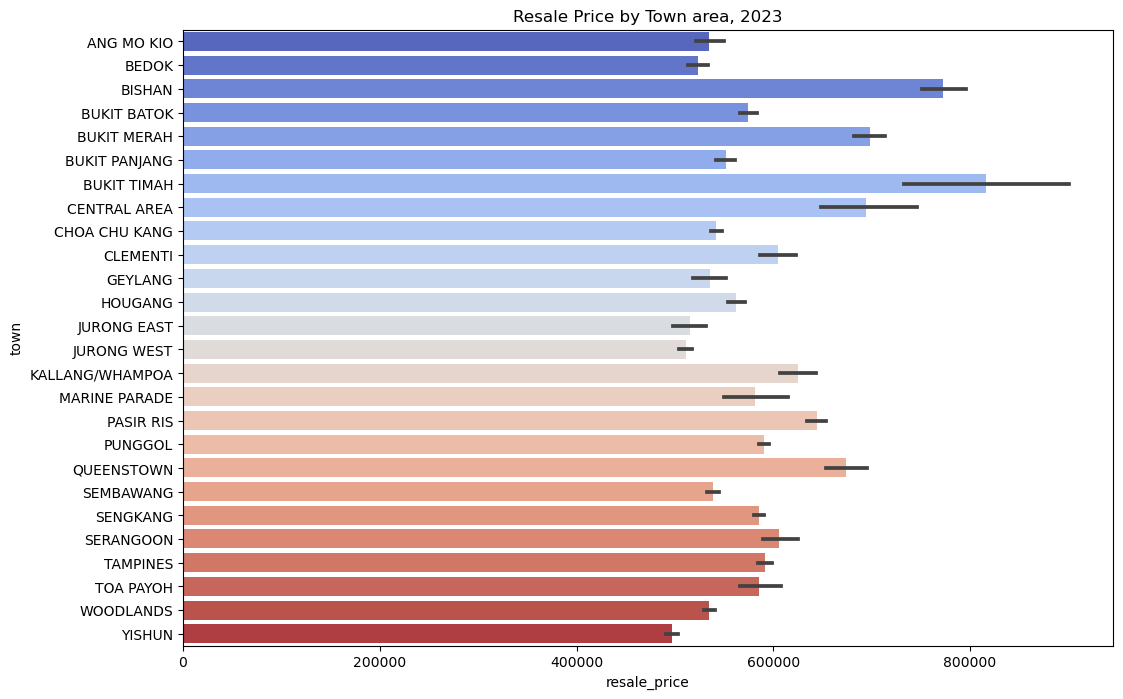

In [31]:
# In 2023, the resale price for flats around Bukit Timah area is the most expensive, followed by Bishan
plt.figure(figsize=(12,8), dpi=100)
sns.barplot(data=df2, y='town', x='resale_price', palette='coolwarm')
plt.title('Resale Price by Town area, 2023');

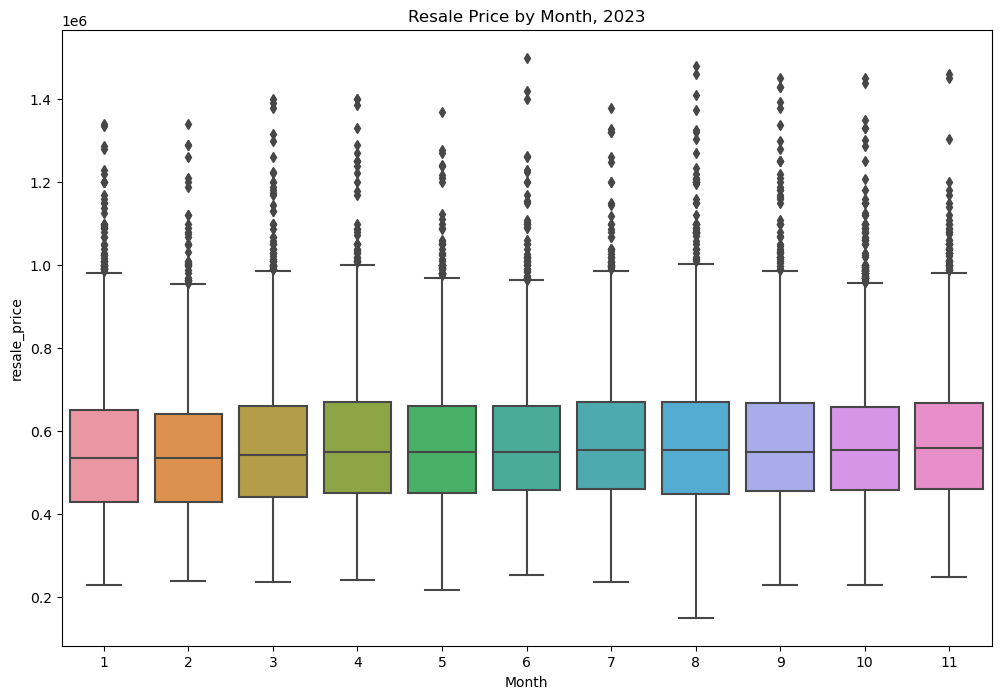

In [32]:
# Price of HDB flats in April 2023 is observed to be the highest.
plt.figure(figsize=(12,8), dpi=100)
sns.boxplot(data=df2, x='Month', y='resale_price')
plt.title('Resale Price by Month, 2023');

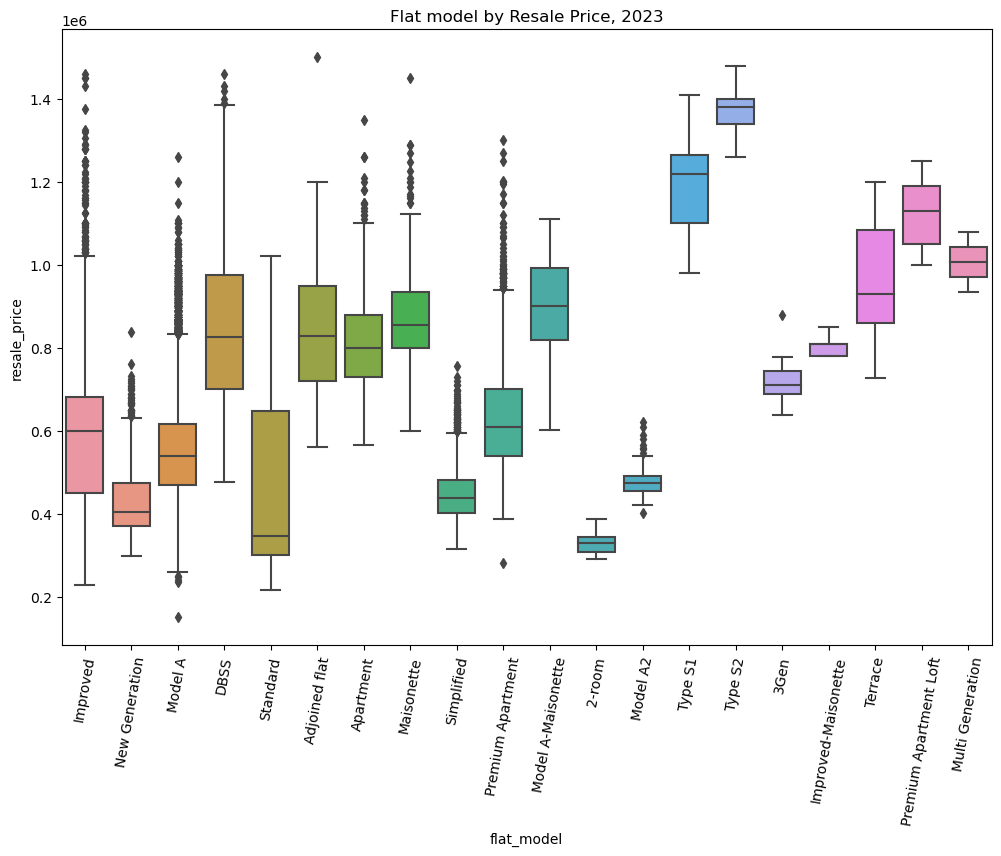

In [33]:
# Type S2 = most expensive, 2 room flats = cheapest
plt.figure(figsize=(12,8), dpi=100)
sns.boxplot(data=df2, x='flat_model', y='resale_price')
plt.title('Flat model by Resale Price, 2023')
plt.xticks(rotation=80);

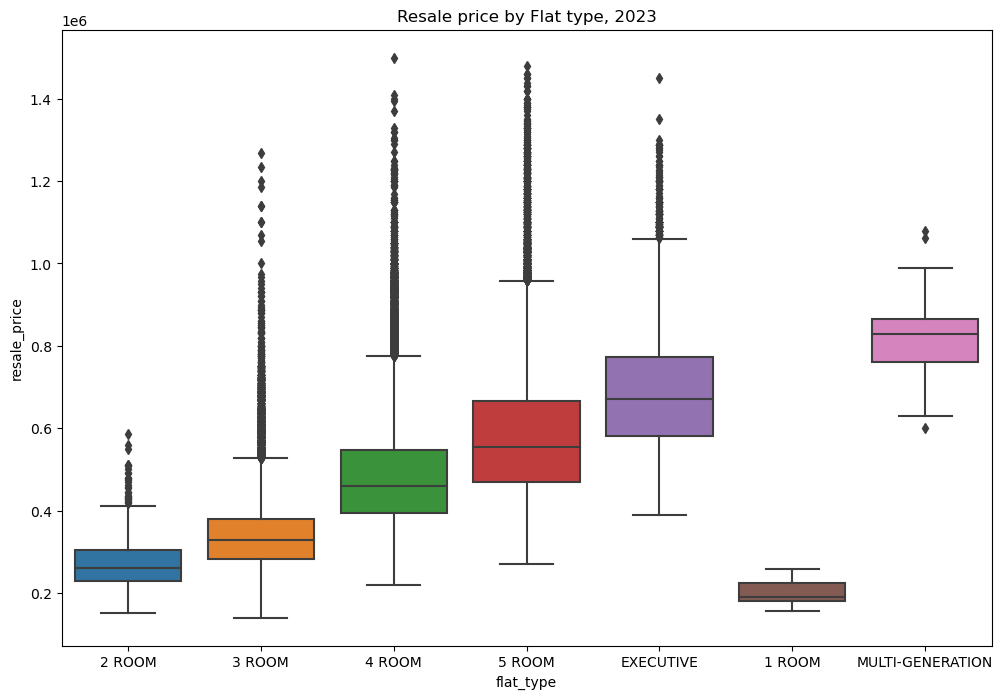

In [34]:
# In 2023, multi-generation flats most expensive, 1 room flat = cheapest
plt.figure(figsize=(12,8), dpi=100)
sns.boxplot(data=df, x='flat_type', y='resale_price')
plt.title('Resale price by Flat type, 2023');

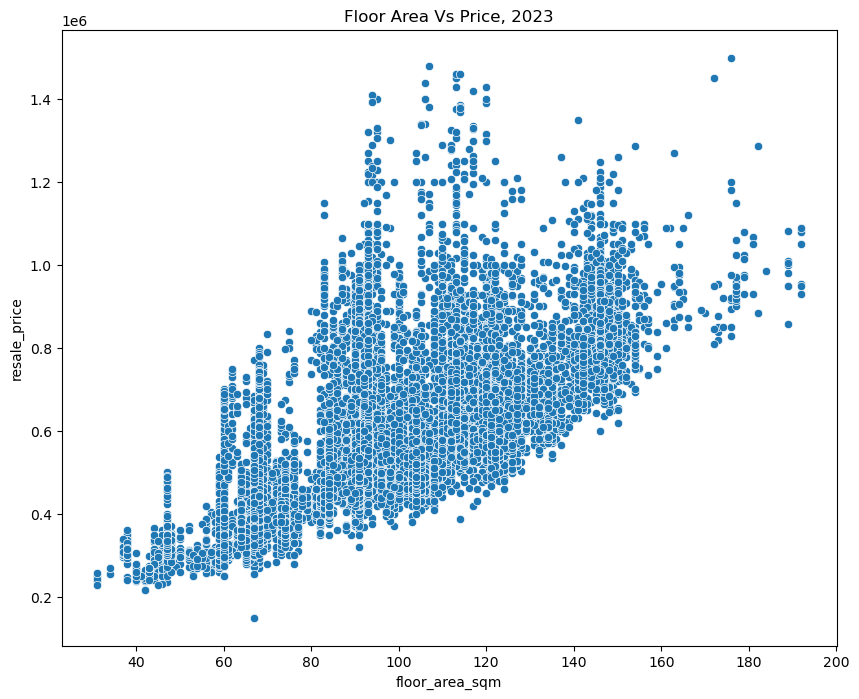

In [35]:
# In 2023, there seems to be a linear relationship (correlation) between floor area and Resale Price 
plt.figure(figsize=(10,8),dpi=100)
sns.scatterplot(data=df2, x='floor_area_sqm', y='resale_price')
plt.title('Floor Area Vs Price, 2023');

In [36]:
# to remove unimportant variables regression prediction of housing prices
df = df.drop(['street_name','storey_range','block','Month','year'], axis=1)

In [37]:
df.head()

,town,flat_type,floor_area_sqm,flat_model,lease_commence_date,resale_price,Remaining_lease
0,ANG MO KIO,2 ROOM,44.0,Improved,1979,232000.0,61
1,ANG MO KIO,3 ROOM,67.0,New Generation,1978,250000.0,60
2,ANG MO KIO,3 ROOM,67.0,New Generation,1980,262000.0,62
3,ANG MO KIO,3 ROOM,68.0,New Generation,1980,265000.0,62
4,ANG MO KIO,3 ROOM,67.0,New Generation,1980,265000.0,62


In [38]:
# to check if variables are in their correct data types
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 166801 entries, 0 to 167078
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   town                 166801 non-null  object 
 1   flat_type            166801 non-null  object 
 2   floor_area_sqm       166801 non-null  float64
 3   flat_model           166801 non-null  object 
 4   lease_commence_date  166801 non-null  int64  
 5   resale_price         166801 non-null  float64
 6   Remaining_lease      166801 non-null  object 
dtypes: float64(2), int64(1), object(4)
memory usage: 10.2+ MB


In [39]:
# to convert 'Remaining_lease' to integar type
df['Remaining_lease'] = df['Remaining_lease'].astype('int')

In [40]:
df['Remaining_lease'].dtype

dtype('int32')

In [41]:
# to define X and y
X = df.drop('resale_price', axis=1)

In [42]:
# to convert categorical variables into dummy variables before ML algorithm
X = pd.get_dummies(X, drop_first=True)

In [43]:
y = df['resale_price']

In [44]:
X

,floor_area_sqm,lease_commence_date,Remaining_lease,town_BEDOK,town_BISHAN,town_BUKIT BATOK,town_BUKIT MERAH,town_BUKIT PANJANG,town_BUKIT TIMAH,town_CENTRAL AREA,...,flat_model_Multi Generation,flat_model_New Generation,flat_model_Premium Apartment,flat_model_Premium Apartment Loft,flat_model_Premium Maisonette,flat_model_Simplified,flat_model_Standard,flat_model_Terrace,flat_model_Type S1,flat_model_Type S2
0,44.0,1979,61,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,67.0,1978,60,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
2,67.0,1980,62,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
3,68.0,1980,62,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
4,67.0,1980,62,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167074,154.0,1987,63,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
167075,146.0,1987,63,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
167076,146.0,1988,63,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
167077,179.0,1987,63,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False


In [45]:
from sklearn.model_selection import train_test_split

In [46]:
from sklearn.preprocessing import StandardScaler

In [47]:
# testing set = 30%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [48]:
scaler = StandardScaler()

In [49]:
scaled_X_train = scaler.fit_transform(X_train)

In [50]:
scaled_X_test = scaler.transform(X_test)

In [51]:
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor

In [52]:
from xgboost import XGBRegressor

In [53]:
rf = RandomForestRegressor()

In [54]:
rf.fit(scaled_X_train,y_train)

RandomForestRegressor()

In [55]:
# to prediction on the X test data
rf_pred = rf.predict(scaled_X_test)

In [56]:
rf_pred

array([329513.08190476, 423665.46      , 379431.41469256, ...,
       558938.45280126, 300236.84126984, 281202.81062524])

In [57]:
# to import performance evaluation metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [58]:
mean_absolute_error(y_test,rf_pred)

29352.25968293003

In [59]:
mean_squared_error(y_test,rf_pred)

1691089699.334911

In [60]:
print('RootMSE_RF:', np.sqrt(mean_squared_error(y_test,rf_pred)))

RootMSE_RF: 41122.86103051332


In [61]:
testing_score = []

In [62]:
a = r2_score(y_test,rf_pred)*100
testing_score.append(a)

print(f"r2_Score of {rf} model on Testing Data is:",a) # Random Forest regressor model = 94%

r2_Score of RandomForestRegressor() model on Testing Data is: 94.10841999486304


In [63]:
xg = XGBRegressor()

In [64]:
xg.fit(scaled_X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [65]:
# to print on the X testing data
xg_pred = xg.predict(scaled_X_test)

In [66]:
xg_pred

array([304400.94, 363505.06, 351716.3 , ..., 562653.8 , 324274.22,
       297363.53], dtype=float32)

In [67]:
mean_squared_error(y_test,xg_pred)

2063166919.3569388

In [68]:
print('RootMSE_XGBoost:', np.sqrt(mean_squared_error(y_test,xg_pred)))

RootMSE_XGBoost: 45422.09725845933


In [69]:
b = r2_score(y_test,xg_pred)*100
testing_score.append(b)

print(f"r2_Score of {xg} model on Testing Data is:",b) # accuracy rate of the XGBoost regressor = 92.8%

r2_Score of XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...) model on Testing Data is: 92.81214179583502


In [70]:
# to define the AdaBoost regressor model
ada = AdaBoostRegressor()

In [71]:
ada.fit(scaled_X_train,y_train)

AdaBoostRegressor()

In [72]:
# to predict on the X test set
ada_pred = ada.predict(scaled_X_test)

In [73]:
ada_pred 

array([433159.92710786, 674037.70418876, 433159.92710786, ...,
       686213.11987842, 433159.92710786, 433159.92710786])

In [74]:
mean_squared_error(y_test,ada_pred)

24462768417.540524

In [75]:
print('RootMSE_AdaBoost:', np.sqrt(mean_squared_error(y_test,ada_pred)))

RootMSE_AdaBoost: 156405.7812791475


In [76]:
c = r2_score(y_test,ada_pred)*100
testing_score.append(c)

print(f"r2_Score of {ada} model on Testing Data is:",c) # Accuracy rate of the AdaBoost regressor model = 21%

r2_Score of AdaBoostRegressor() model on Testing Data is: 14.774268132695667


In [77]:
# to define the GradientBoost regressor model
gb = GradientBoostingRegressor()

In [78]:
# to fit the model to X training data
gb.fit(scaled_X_train,y_train)

GradientBoostingRegressor()

In [79]:
# to do prediction on the X test data
gb_pred = gb.predict(scaled_X_test)

In [80]:
mean_squared_error(y_test,gb_pred)

5959070478.314258

In [81]:
print('RootMSE_GradientBoost regressor:', np.sqrt(mean_squared_error(y_test,gb_pred)))

RootMSE_GradientBoost regressor: 77195.01589036858


In [82]:
d = r2_score(y_test,gb_pred)*100
testing_score.append(d)

print(f"r2_Score of {gb} model on Testing Data is:",d) # Accuracy rate of Gradient Boost regressor = 79.2%

r2_Score of GradientBoostingRegressor() model on Testing Data is: 79.23922043103573


In [83]:
from sklearn.tree import DecisionTreeRegressor

In [84]:
# to define the Decision tree regressor model
dt = DecisionTreeRegressor()

In [85]:
# to fit the decision tree to the training data
dt.fit(scaled_X_train,y_train)

DecisionTreeRegressor()

In [86]:
# to predict on the X test set
dt_pred = dt.predict(scaled_X_test)

In [87]:
# mean square error is used because, resale price of the house is predicted, continous variable
mean_squared_error(y_test,dt_pred)

1936156128.9062457

In [88]:
print('RootMSE_DecisionTree regressor:', np.sqrt(mean_squared_error(y_test,dt_pred)))

RootMSE_DecisionTree regressor: 44001.7741563479


In [89]:
e = r2_score(y_test,dt_pred)*100
testing_score.append(3)

print(f"r2_Score of {dt} model on Testing Data is:",e) # accuracy score of the Decision tree regressor = 93.2%

r2_Score of DecisionTreeRegressor() model on Testing Data is: 93.25463413302461


In [90]:
# the accuracy rate of the Random Forest regressor = 94%
rf.feature_importances_

array([4.36817014e-01, 1.64704871e-01, 6.97010164e-02, 5.89885046e-03,
       1.79417840e-02, 2.38211370e-03, 4.60637170e-02, 2.77502206e-03,
       5.99413529e-03, 2.53618873e-02, 6.10025475e-03, 1.23191449e-02,
       1.17823503e-02, 2.52572141e-03, 2.72541173e-03, 6.62362114e-03,
       2.15464562e-02, 5.58555377e-03, 2.14072642e-03, 2.25290823e-03,
       3.68152977e-02, 2.61800495e-03, 2.78381043e-03, 3.28691289e-03,
       5.08915417e-03, 1.74501255e-02, 8.59368517e-03, 3.78058474e-03,
       2.75203614e-03, 4.65835379e-03, 1.66010532e-02, 3.25822274e-03,
       1.11401757e-03, 2.16171906e-05, 2.43279791e-06, 1.80619816e-04,
       5.10865111e-04, 2.66055521e-02, 2.93099117e-03, 3.41867414e-05,
       3.62090935e-04, 3.52346028e-03, 1.45586479e-04, 1.14054304e-04,
       1.80754938e-05, 5.86751723e-04, 2.40552714e-03, 4.96349645e-05,
       2.17656057e-05, 1.53842552e-04, 1.29716661e-03, 8.73659316e-04,
       6.76526768e-05, 5.06473116e-05])

In [91]:
rf_imp = rf.feature_importances_

In [92]:
X.columns

Index(['floor_area_sqm', 'lease_commence_date', 'Remaining_lease',
       'town_BEDOK', 'town_BISHAN', 'town_BUKIT BATOK', 'town_BUKIT MERAH',
       'town_BUKIT PANJANG', 'town_BUKIT TIMAH', 'town_CENTRAL AREA',
       'town_CHOA CHU KANG', 'town_CLEMENTI', 'town_GEYLANG', 'town_HOUGANG',
       'town_JURONG EAST', 'town_JURONG WEST', 'town_KALLANG/WHAMPOA',
       'town_MARINE PARADE', 'town_PASIR RIS', 'town_PUNGGOL',
       'town_QUEENSTOWN', 'town_SEMBAWANG', 'town_SENGKANG', 'town_SERANGOON',
       'town_TAMPINES', 'town_TOA PAYOH', 'town_WOODLANDS', 'town_YISHUN',
       'flat_type_2 ROOM', 'flat_type_3 ROOM', 'flat_type_4 ROOM',
       'flat_type_5 ROOM', 'flat_type_EXECUTIVE', 'flat_type_MULTI-GENERATION',
       'flat_model_3Gen', 'flat_model_Adjoined flat', 'flat_model_Apartment',
       'flat_model_DBSS', 'flat_model_Improved',
       'flat_model_Improved-Maisonette', 'flat_model_Maisonette',
       'flat_model_Model A', 'flat_model_Model A-Maisonette',
       'flat_model_

In [93]:
# to read into an 'Importance' dataframe
rf_feat = pd.DataFrame(data= rf_imp, index= X.columns, columns=['Importance']).sort_values('Importance', ascending=False)

In [94]:
rf_feat

,Importance
floor_area_sqm,0.436817
lease_commence_date,0.164705
Remaining_lease,0.069701
town_BUKIT MERAH,0.046064
town_QUEENSTOWN,0.036815
flat_model_DBSS,0.026606
town_CENTRAL AREA,0.025362
town_KALLANG/WHAMPOA,0.021546
town_BISHAN,0.017942
town_TOA PAYOH,0.017450


In [95]:
# to filter out the level of variable importance < 0.005
rf_feat = rf_feat[rf_feat['Importance'] > 0.005]

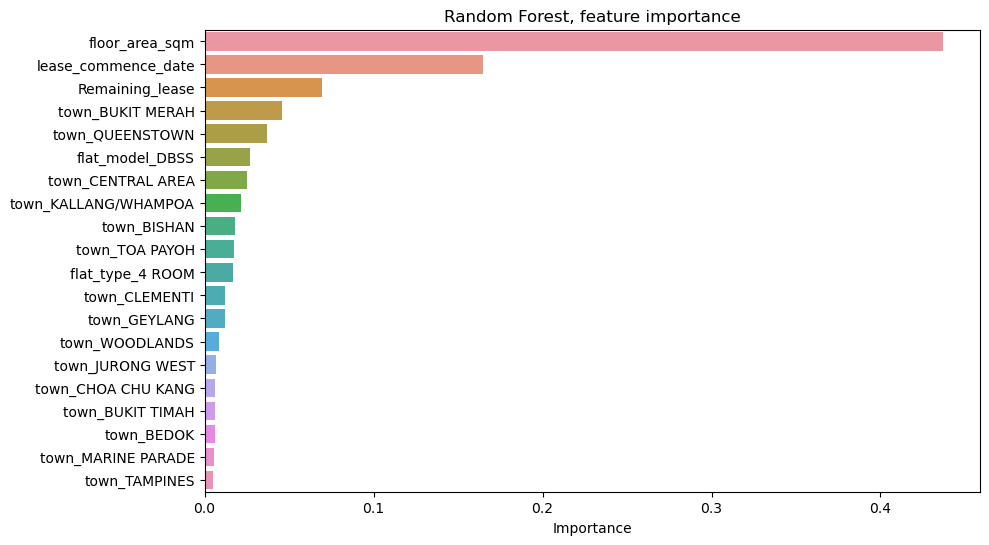

In [96]:
# the accuracy rate of the Random Forest regressor = 94%
# Top 3 predictors of resale flat prices are: 'Floor area(sqm)','lease commence date',' remaining lease year'
# to visualise variable importance of the Random Forest in a barplot
plt.figure(figsize=(10,6), dpi=100)
sns.barplot(data=rf_feat, y=rf_feat.index, x='Importance')
plt.title('Random Forest, feature importance');

In [97]:
# performance metrics, to calculate the absolute errors
errors = abs(rf_pred - y_test)

In [98]:
# Calculate mean absolute percentage error (MAPE), determine performance metrics
mape = 100 * (errors / y_test)

In [99]:
# Calculate and display accuracy
# the accuracy rate of Random Forest regressor model = 94%
accuracy = 100 - np.mean(mape)
print('RF_Accuracy:', round(accuracy, 2), '%.')

RF_Accuracy: 93.97 %.


In [100]:
# performance metrics, to calculate the absolute errors
xg_errors = abs(xg_pred - y_test)

In [101]:
# Calculate mean absolute percentage error (MAPE), determine performance metrics
xg_mape = 100 * (xg_errors / y_test)

In [102]:
# Calculate and display accuracy
# the accuracy rate of XGBoost regressor model = 93.2%
accuracy = 100 - np.mean(xg_mape)
print('XGB_Accuracy:', round(accuracy, 2), '%.')

XGB_Accuracy: 93.15 %.


In [103]:
# performance metrics, to calculate the absolute errors
dt_errors = abs(dt_pred - y_test)

In [104]:
# Calculate mean absolute percentage error (MAPE), determine performance metrics
dt_mape = 100 * (dt_errors / y_test)

In [105]:
# Calculate and display accuracy
# the accuracy rate of Decision Tree model = 93.7
accuracy = 100 - np.mean(dt_mape)
print('DT_Accuracy:', round(accuracy, 2), '%.')

DT_Accuracy: 93.72 %.
